In [166]:
from PIL import Image
import numpy as np
import cv2
import cupy as cp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from time import time
from scipy.ndimage.filters import convolve
from skimage.transform import rescale
%matplotlib inline

In [167]:
im  = plt.imread("Mandelbrot.jpg") 

In [168]:
kernel = np.array([[1, 3, 1],
                   [3, 9, 3],
                   [1, 3, 1]])
kernel = kernel/25

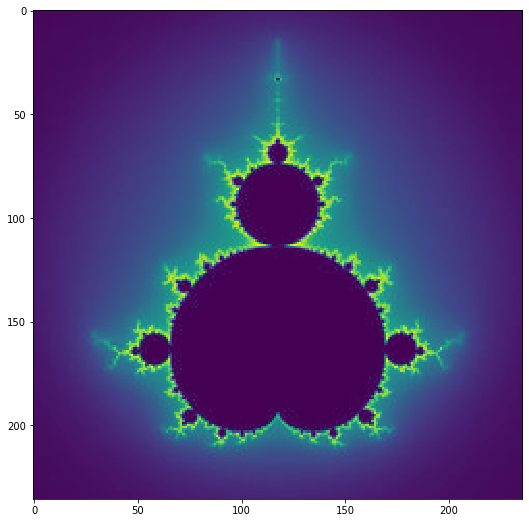

In [169]:
plt.figure(figsize = (9,9))
plt.imshow(im)

In [170]:
def Blur_np(im, kernel):
    Blur = np.zeros(im.shape)    
    new_im = np.zeros((im.shape[0] + 2, im.shape[1] + 2))
    new_im[1:-1, 1:-1] = im

    for i in np.arange(Blur.shape[0]):
        for j in np.arange(Blur.shape[1]):
            Blur[i, j] = (new_im[i: i + 3, j: j + 3] * kernel).sum()
            
    return Blur

In [171]:
from numba import jit
@jit
def Blur_numba(im, kernel):
    Blur = np.zeros(im.shape)
    new_im = np.zeros((im.shape[0] + 2, im.shape[1] + 2))
    new_im[1:-1, 1:-1] = im
    for i in np.arange(Blur.shape[0]):
        for j in np.arange(Blur.shape[1]):
            Blur[i, j] = (new_im[i: i + 3, j: j + 3] * kernel).sum()
            
    return Blur

In [174]:
def Blur_cp(image, kernel):
    Blur = cp.zeros(im.shape)
    new_im = cp.zeros((im.shape[0] + 2, im.shape[1] + 2))
    new_im[1:-1, 1:-1] = cp.asarray(im)
    for i in cp.arange(Blur.shape[0]):
        for j in cp.arange(Blur.shape[1]):
            Blur[i, j] = (new_im[i: i + 3, j: j + 3] * cp.asarray(kernel)).sum()
            
    return Blur

In [187]:
im_blur_np = Blur_np(im, kernel)
im_blur_cp = Blur_np(im, kernel)
im_blur_numba = Blur_numba(im, kernel)

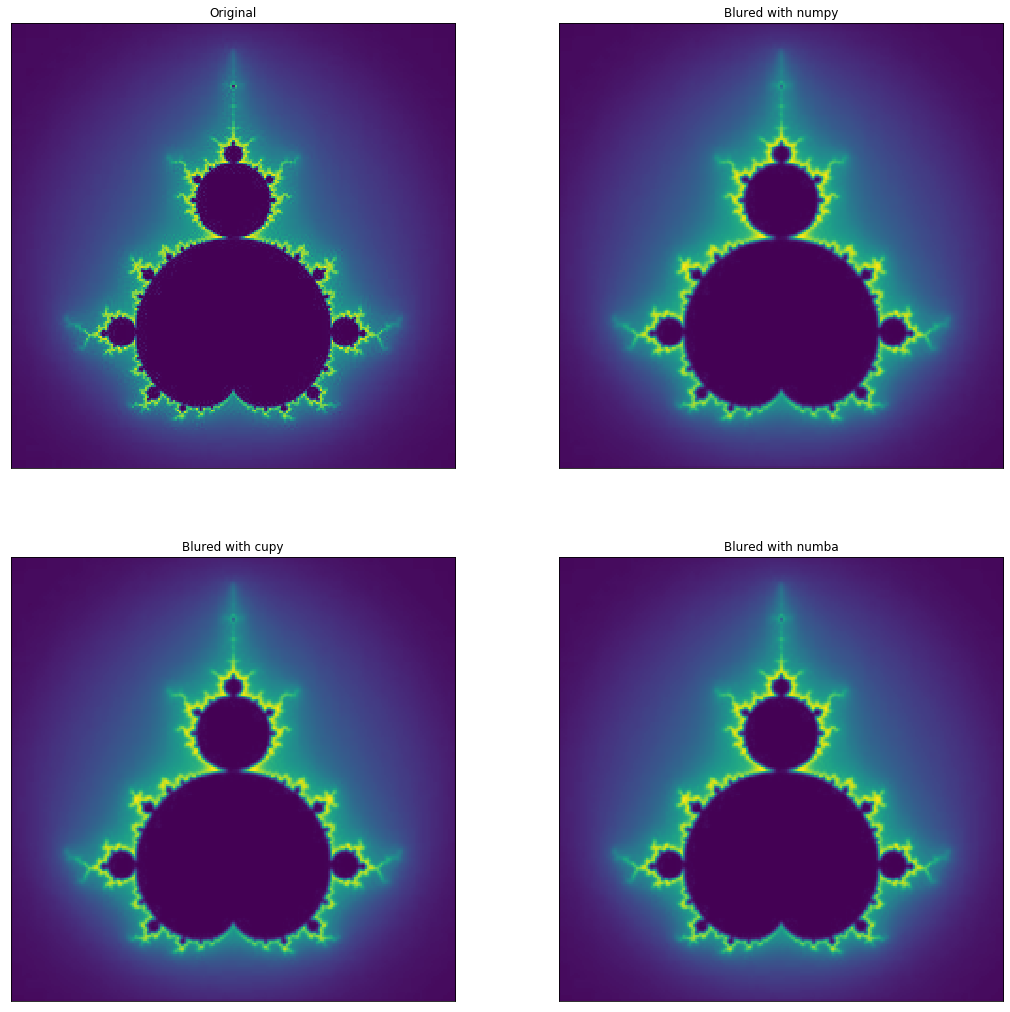

In [189]:
plt.figure(figsize = (18,18))
plt.subplot(221),plt.imshow(im),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(im_blur_np),plt.title('Blured with numpy')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(im_blur_cp),plt.title('Blured with cupy')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(im_blur_numba),plt.title('Blured with numba')
plt.xticks([]), plt.yticks([])
plt.show()

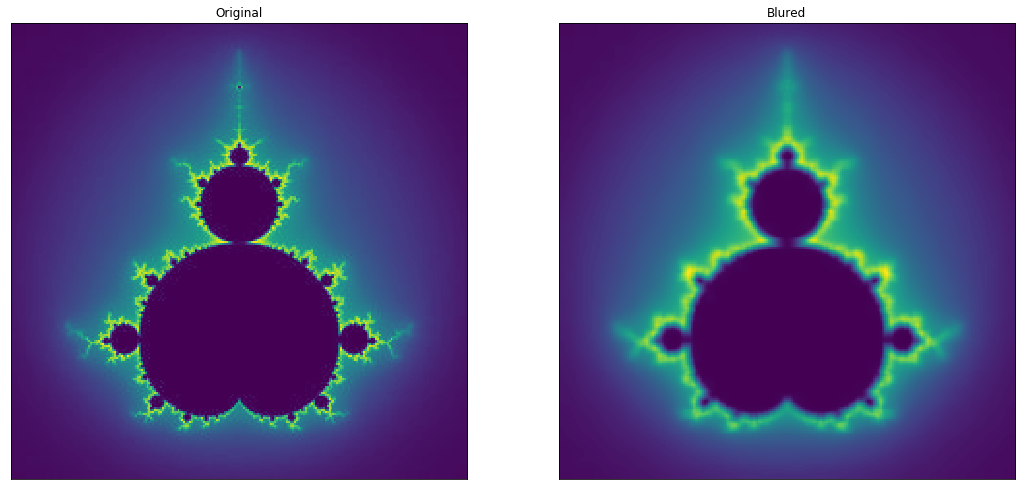

In [122]:
kernel = np.ones((5,5),np.float32)/25
plt.figure(figsize = (18,9))
dst = cv2.filter2D(im,-1,kernel)
plt.subplot(121),plt.imshow(im),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Blured')
plt.xticks([]), plt.yticks([])
plt.show()